In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import  KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('income-Kmeans.csv')
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [3]:
data = data.drop('Name', axis=1)

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
scaled_data = pd.DataFrame(scaled_data ,columns=data.columns)
scaled_data

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


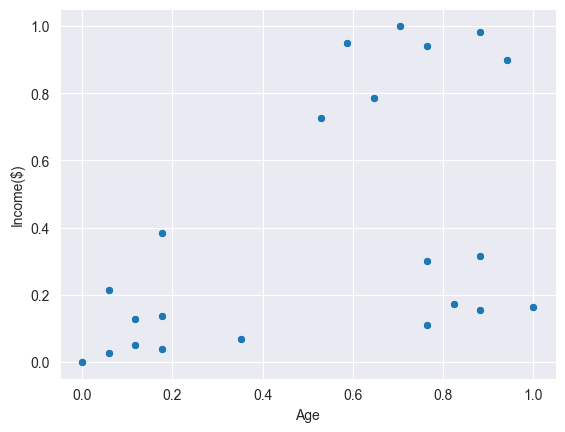

In [7]:
sns.scatterplot(scaled_data, x='Age', y='Income($)')
plt.show()

In [8]:
scores = []
for k in range(2 , 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    scores.append(model.inertia_) # WCSS

In [9]:
scores

[2.091136388699078,
 0.4750783498553096,
 0.38815291664787444,
 0.3463500573210597,
 0.22020960864009398,
 0.216352994511543,
 0.16252698982159552,
 0.1118134510210044]

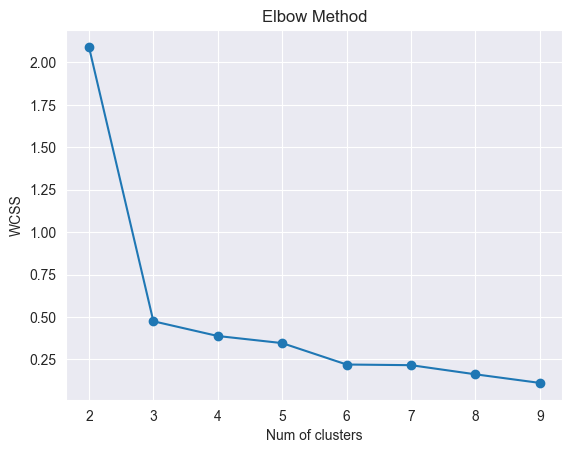

In [10]:
plt.plot(range(2 , 10) , scores , marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [11]:
s_scores = []
for k in range(2 , 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    y_pred = model.predict(scaled_data)
    s_scores.append(silhouette_score(scaled_data ,y_pred))

In [12]:
s_scores

[0.5600636053855829,
 0.7129710183539274,
 0.6094875531451848,
 0.5035508225153914,
 0.39523695607584647,
 0.26524641686003525,
 0.2654549937896844,
 0.30106065446877506]

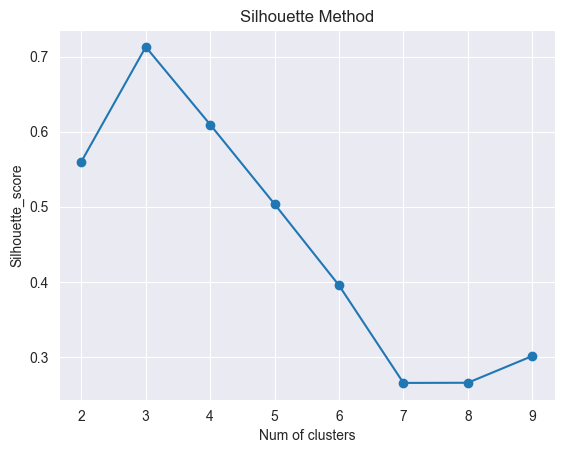

In [13]:
plt.plot(range(2 , 10) , s_scores , marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('Silhouette_score')
plt.title('Silhouette Method')
plt.show()

In [14]:
best_model = KMeans(n_clusters=3)
best_model.fit(scaled_data)
y_pred = best_model.predict(scaled_data)

In [15]:
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [16]:
scaled_data['cluster'] = y_pred

In [18]:
scaled_data

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,0.948718,2
9,0.529412,0.726496,2


In [20]:
centroids = best_model.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

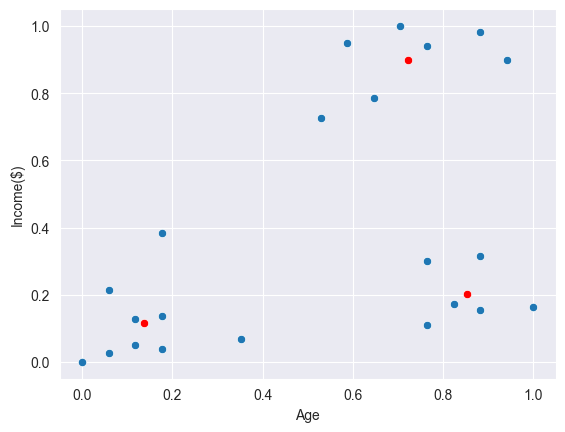

In [21]:
sns.scatterplot(scaled_data, x='Age', y='Income($)')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], c='red')
plt.show()

In [22]:
data_0 = scaled_data[scaled_data['cluster'] == 0]
data_1 = scaled_data[scaled_data['cluster'] == 1]
data_2 = scaled_data[scaled_data['cluster'] == 2]

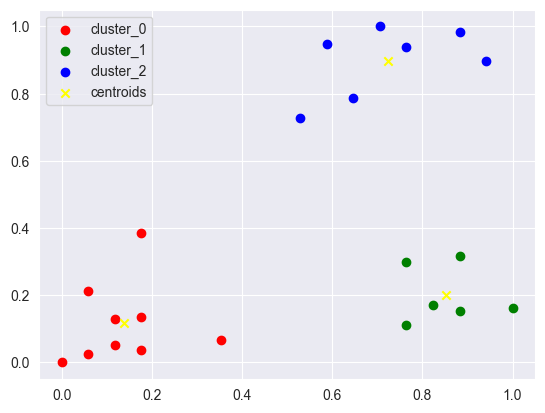

In [30]:
plt.scatter(data_0['Age'] , data_0['Income($)'] ,color = 'red' , label = 'cluster_0')
plt.scatter(data_1['Age'] , data_1['Income($)'] ,color = 'green' , label = 'cluster_1')
plt.scatter(data_2['Age'] , data_2['Income($)'] ,color = 'blue' , label = 'cluster_2')
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], color = 'yellow', label= 'centroids', marker='x')
plt.legend()
plt.show()